In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras import models
from keras import layers

normalized_data = pd.read_csv("normalized_data_with_predicted_age.csv", index_col=0)
normalized_data 

Using TensorFlow backend.


,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
PassengerId,,,,,,,,,,,
1,0.0,1.0,0.273456,0.125,0.000000,0.014151,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.473882,0.125,0.000000,0.139136,1.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.323563,0.000,0.000000,0.015469,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.436302,0.125,0.000000,0.103644,1.0,0.0,0.0,0.0,1.0
5,0.0,1.0,0.436302,0.000,0.000000,0.015713,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1300,NaN,1.0,0.323490,0.000,0.000000,0.015070,1.0,0.0,0.0,1.0,0.0
1302,NaN,1.0,0.323491,0.000,0.000000,0.015127,1.0,0.0,0.0,1.0,0.0
1305,NaN,1.0,0.339166,0.000,0.000000,0.015713,0.0,1.0,0.0,0.0,1.0


## Split data into train and test

In [2]:
normalized_train_data = normalized_data[normalized_data.Survived.notna()]
normalized_test_data = normalized_data[normalized_data.Survived.isna()]
normalized_train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
PassengerId,,,,,,,,,,,
1,0.0,1.0,0.273456,0.125,0.000000,0.014151,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.473882,0.125,0.000000,0.139136,1.0,0.0,1.0,0.0,0.0
3,1.0,1.0,0.323563,0.000,0.000000,0.015469,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.436302,0.125,0.000000,0.103644,1.0,0.0,0.0,0.0,1.0
5,0.0,1.0,0.436302,0.000,0.000000,0.015713,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
860,0.0,1.0,0.329695,0.000,0.000000,0.014110,0.0,1.0,1.0,0.0,0.0
864,0.0,1.0,0.182089,1.000,0.222222,0.135753,1.0,0.0,0.0,0.0,1.0
869,0.0,1.0,0.339242,0.000,0.000000,0.018543,0.0,1.0,0.0,0.0,1.0


## Creating model

In [3]:
x_train = normalized_train_data.drop(["Survived"], axis=1)
y_train = normalized_train_data["Survived"].values
model = models.Sequential()
model.add(layers.Dense(10, activation="relu", input_shape=(10,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["acc"])

history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=16,
                    validation_split=0.2)

Train on 712 samples, validate on 179 samples
Epoch 1/100
712/712 [==============================] - 0s 535us/step - loss: 0.6485 - acc: 0.5969 - val_loss: 0.5803 - val_acc: 0.7039
Epoch 2/100
712/712 [==============================] - 0s 142us/step - loss: 0.6276 - acc: 0.6264 - val_loss: 0.5449 - val_acc: 0.7542
Epoch 3/100
712/712 [==============================] - 0s 189us/step - loss: 0.6008 - acc: 0.6756 - val_loss: 0.5223 - val_acc: 0.7654
Epoch 4/100
712/712 [==============================] - 0s 153us/step - loss: 0.5771 - acc: 0.6980 - val_loss: 0.4923 - val_acc: 0.8324
Epoch 5/100
712/712 [==============================] - 0s 183us/step - loss: 0.5848 - acc: 0.7079 - val_loss: 0.4931 - val_acc: 0.8547
Epoch 6/100
712/712 [==============================] - 0s 267us/step - loss: 0.5712 - acc: 0.7289 - val_loss: 0.4836 - val_acc: 0.8547
Epoch 7/100
712/712 [==============================] - 0s 216us/step - loss: 0.5630 - acc: 0.7654 - val_loss: 0.4731 - val_acc: 0.8547
Epoch 8/1

Epoch 61/100
712/712 [==============================] - 0s 164us/step - loss: 0.4620 - acc: 0.7907 - val_loss: 0.4496 - val_acc: 0.7430
Epoch 62/100
712/712 [==============================] - 0s 134us/step - loss: 0.4540 - acc: 0.8020 - val_loss: 0.4508 - val_acc: 0.7654
Epoch 63/100
712/712 [==============================] - 0s 169us/step - loss: 0.4637 - acc: 0.7935 - val_loss: 0.4476 - val_acc: 0.7598
Epoch 64/100
712/712 [==============================] - 0s 282us/step - loss: 0.4915 - acc: 0.8006 - val_loss: 0.4512 - val_acc: 0.7430
Epoch 65/100
712/712 [==============================] - 0s 132us/step - loss: 0.4723 - acc: 0.7935 - val_loss: 0.4511 - val_acc: 0.7598
Epoch 66/100
712/712 [==============================] - 0s 143us/step - loss: 0.4786 - acc: 0.7865 - val_loss: 0.4539 - val_acc: 0.7654
Epoch 67/100
712/712 [==============================] - 0s 224us/step - loss: 0.4646 - acc: 0.7978 - val_loss: 0.4450 - val_acc: 0.7430
Epoch 68/100
712/712 [==========================

## Drawing plots

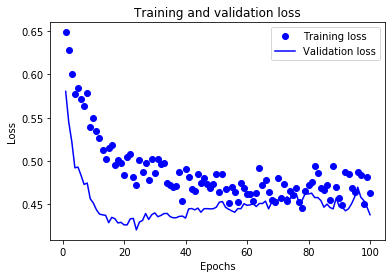

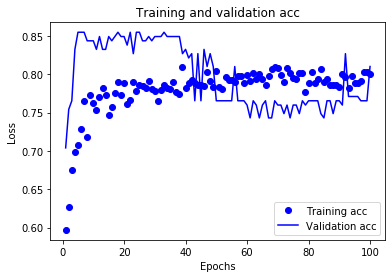

In [4]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]

plt.plot(epochs, acc_values, "bo", label="Training acc")
plt.plot(epochs, val_acc_values, "b", label="Validation acc")
plt.title("Training and validation acc")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

## Evaluate results

In [8]:
results = model.predict(normalized_test_data.drop(["Survived"], axis=1))
results = pd.DataFrame(results, columns=["Survived"], index=normalized_test_data.index)

results.loc[results.Survived < 0.5, ["Survived"]] = 0
results.loc[results.Survived >= 0.5, ["Survived"]] = 1
results = results.fillna(0)
results.Survived = results.Survived.astype(int)
results

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1300,1
1302,1
1305,0


## Save results

In [6]:
results.to_csv("Output/my_prediction.csv", index=True)

## Compare with genderr submission

In [9]:
compare = pd.read_csv("Dataset/gender_submission.csv", index_col=0)
# compare = pd.read_csv("7799.csv", index_col=0)
compare = compare.rename(columns={"Survived": "Example"})
compare = pd.concat([compare, results], axis=1)
compare = compare.rename(columns={"Survived": "MyPrediction"})
compare[compare.Example != compare.MyPrediction]

,Example,MyPrediction
PassengerId,,
893,1,0
896,1,0
898,1,0
910,1,0
911,1,0
915,0,1
924,1,0
925,1,0
941,1,0
